# Gaussian random walk by Mersenne Twister in GSL

This example shows simple random walk implemented by [Merseene Twister](http://mmottl.github.io/gsl-ocaml/api/Gsl_rng.html) in [gsl-ocaml](http://mmottl.github.io/gsl-ocaml), a binding of GNU Scientific Library (GSL).

In [1]:
#thread ;;
#require "gsl" ;;
#require "jupyter.archimedes" ;;

Module Archimedes loaded and aliased as A.


In [2]:
let random_walk ~rng ~sigma n =
  Array.init n (fun _ -> Gsl.Randist.gaussian ~sigma rng)
  |> Array.fold_left (fun (ws, w) z -> let w' = w +. z in (w' :: ws, w')) ([], 0.0)
  |> fst
  |> List.rev

val random_walk : rng:Gsl.Rng.t -> sigma:float -> int -> float list = <fun>


val rng : Gsl.Rng.t = <abstr>


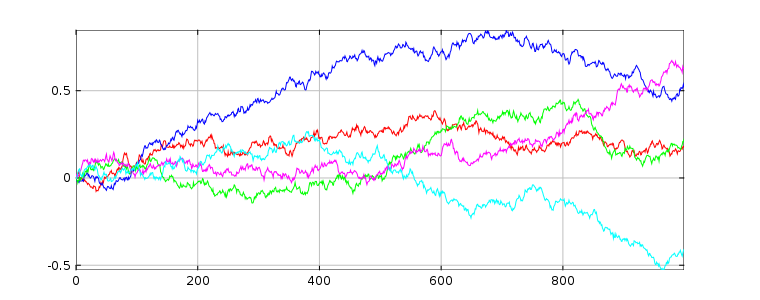

- : unit = ()


In [3]:
let rng = Gsl.Rng.(make MT19937) ;; (* Mersenne Twister *)

let vp = A.init ~w:760. ~h:300. ["jupyter"] in
A.Axes.box vp ;
A.set_color vp A.Color.red ;
A.List.y ~style:`Lines vp (random_walk ~rng ~sigma:0.01 1000) ;
A.set_color vp A.Color.blue ;
A.List.y ~style:`Lines vp (random_walk ~rng ~sigma:0.01 1000) ;
A.set_color vp A.Color.green ;
A.List.y ~style:`Lines vp (random_walk ~rng ~sigma:0.01 1000) ;
A.set_color vp A.Color.magenta ;
A.List.y ~style:`Lines vp (random_walk ~rng ~sigma:0.01 1000) ;
A.set_color vp A.Color.cyan ;
A.List.y ~style:`Lines vp (random_walk ~rng ~sigma:0.01 1000) ;
A.close vp